In [10]:
import numpy as np
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math, warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [8]:
def get_info(df):
    print('Shape:',df.shape)
    print('Size: {:5.2f} MB'.format(df.memory_usage().sum()/1024**2))
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
    display(tab_info)
    display(df[:5])

In [29]:
dir_path = os.getenv('HOME') + '/aiffel/restaurant_forecasting'

air_visit = pd.read_csv(dir_path + '/air_visit_data.csv')
air_reserve = pd.read_csv(dir_path + '/air_reserve.csv')
air_store = pd.read_csv(dir_path + '/air_store_info.csv')
hpg_reserve = pd.read_csv(dir_path + '/hpg_reserve.csv')
hpg_store = pd.read_csv(dir_path + '/hpg_store_info.csv')
store_id = pd.read_csv(dir_path + '/store_id_relation.csv')
submission = pd.read_csv(dir_path + '/sample_submission.csv')
holiday = pd.read_csv(dir_path + '/date_info.csv')

file_list = [air_visit, air_reserve, air_store, hpg_reserve, hpg_store, store_id, submission, holiday]

In [31]:
for file in file_list:
    for col in file:
        if col.endswith('datetime') or col.endswith('date'):
            file[col] = pd.to_datetime(file[col])

In [32]:
for file in file_list:
    get_info(file)

Shape: (252108, 3)
Size:  5.77 MB


,air_store_id,visit_date,visitors
column type,object,datetime64[ns],int64
null values,0,0,0
null values (%),0.0,0.0,0.0


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


Shape: (92378, 4)
Size:  2.82 MB


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
column type,object,datetime64[ns],datetime64[ns],int64
null values,0,0,0,0
null values (%),0.0,0.0,0.0,0.0


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


Shape: (829, 5)
Size:  0.03 MB


,air_store_id,air_genre_name,air_area_name,latitude,longitude
column type,object,object,object,float64,float64
null values,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


Shape: (2000320, 4)
Size: 61.05 MB


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
column type,object,datetime64[ns],datetime64[ns],int64
null values,0,0,0,0
null values (%),0.0,0.0,0.0,0.0


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


Shape: (4690, 5)
Size:  0.18 MB


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
column type,object,object,object,float64,float64
null values,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


Shape: (150, 2)
Size:  0.00 MB


,air_store_id,hpg_store_id
column type,object,object
null values,0,0
null values (%),0.0,0.0


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


Shape: (32019, 2)
Size:  0.49 MB


,id,visitors
column type,object,int64
null values,0,0
null values (%),0.0,0.0


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


Shape: (517, 3)
Size:  0.01 MB


,calendar_date,day_of_week,holiday_flg
column type,datetime64[ns],object,int64
null values,0,0,0
null values (%),0.0,0.0,0.0


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


## air_visit

<AxesSubplot:xlabel='visit_date'>

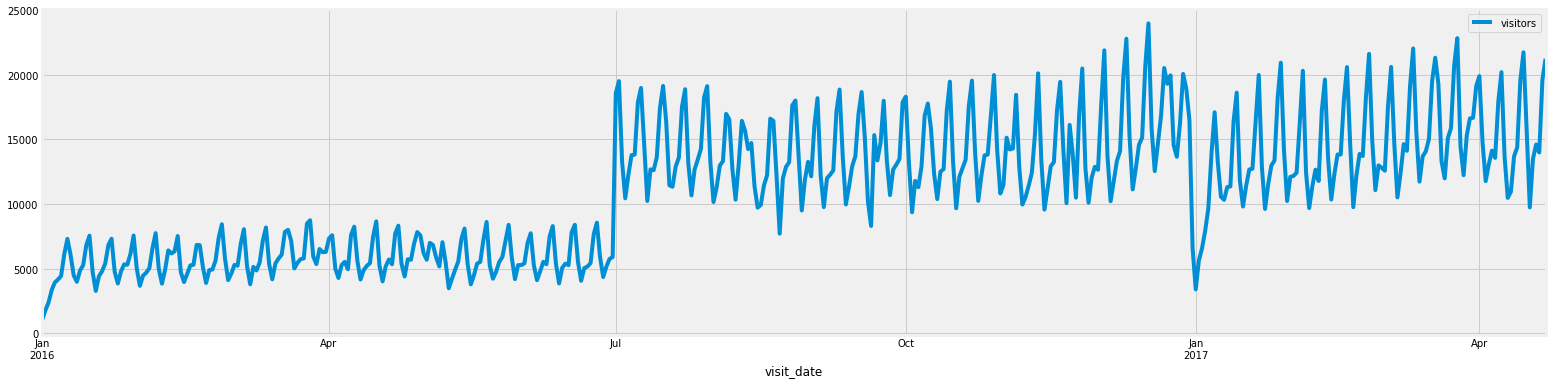

In [33]:
air_visit.groupby('visit_date').sum().plot(figsize=(24,6))

<AxesSubplot:xlabel='visitors'>

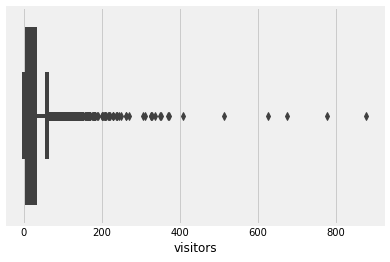

In [26]:
sns.boxplot(air_visit['visitors'])

([<matplotlib.axis.XTick at 0x7f769c14a290>,
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

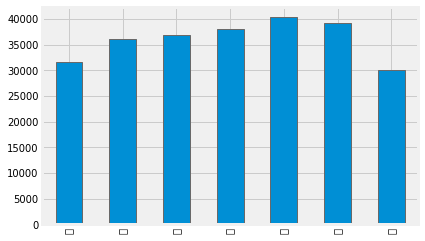

In [52]:
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
x = np.arange(7)
air_visit['visit_date'].dt.dayofweek.value_counts().plot(kind = "bar")
plt.xticks(x, weekday_list)

<AxesSubplot:>

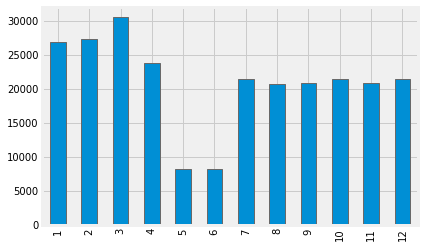

In [53]:
air_visit['visit_date'].dt.month.value_counts().plot(kind = 'bar')

## air_reserve

<AxesSubplot:xlabel='visit_datetime'>

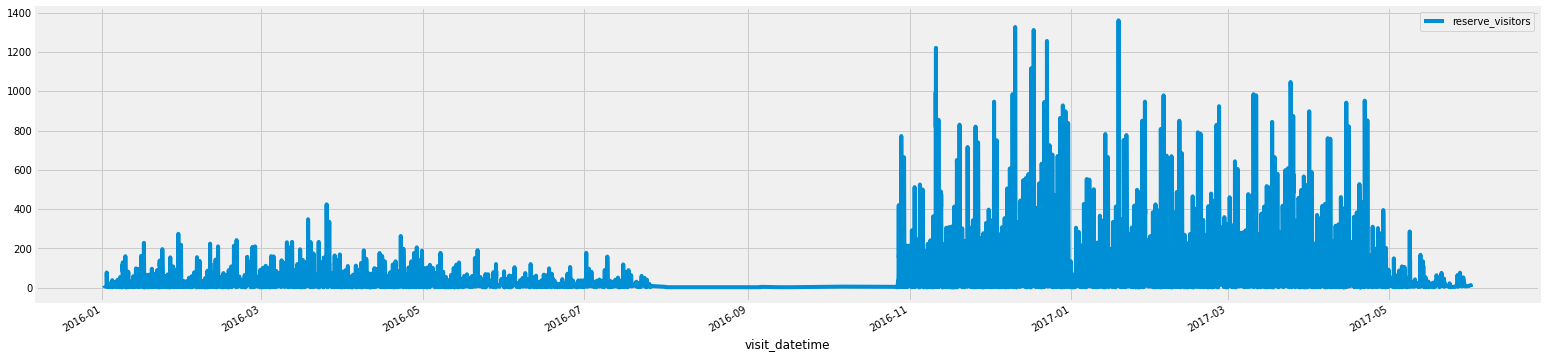

In [55]:
air_reserve.groupby('visit_datetime').sum().plot(figsize=(24,6))

<AxesSubplot:xlabel='reserve_datetime'>

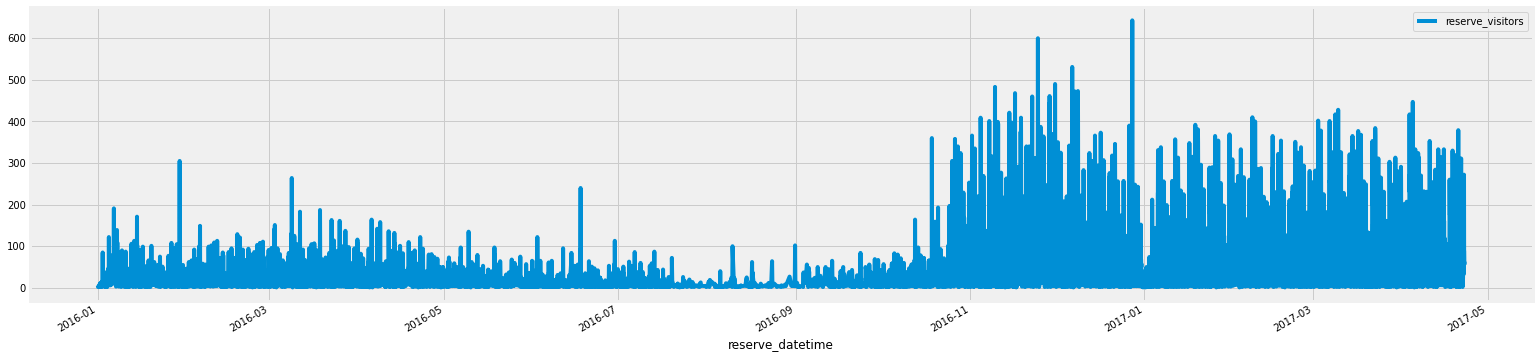

In [56]:
air_reserve.groupby('reserve_datetime').sum().plot(figsize=(24,6))

<AxesSubplot:xlabel='reserve_visitors'>

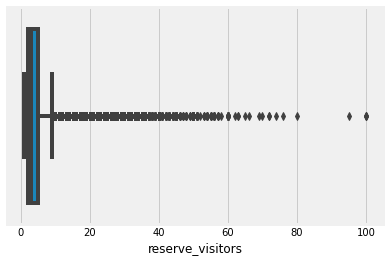

In [58]:
sns.boxplot(air_reserve['reserve_visitors'])

([<matplotlib.axis.XTick at 0x7f76ad696cd0>,
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

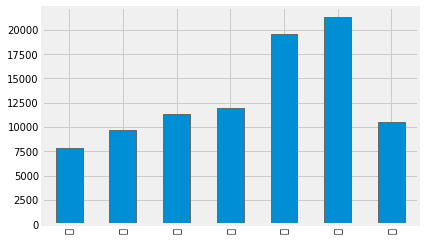

In [60]:
weekday_list = ['월', '화', '수', '목', '금', '토', '일']
x = np.arange(7)
air_reserve['visit_datetime'].dt.dayofweek.value_counts().plot(kind = "bar")
plt.xticks(x, weekday_list)

<AxesSubplot:>

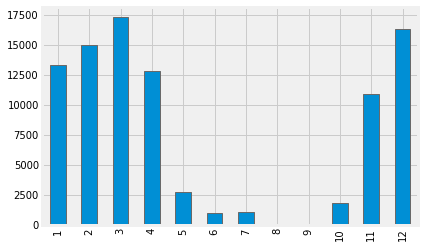

In [62]:
air_reserve['visit_datetime'].dt.month.value_counts().plot(kind = 'bar')

<AxesSubplot:>

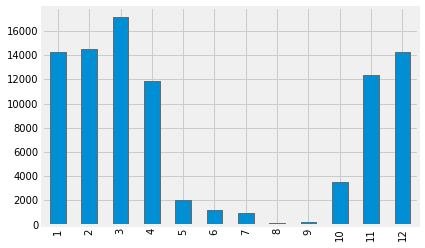

In [63]:
air_reserve['reserve_datetime'].dt.month.value_counts().plot(kind = 'bar')

## Air store